
# MIE479 Capstone Project Main File

The purpose of this program is to run estimation and optimization models for portfolio construction. Please go to section Read input files to change directory and update parameters values.



In [43]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#estimators

In [44]:
import numpy as np
import cvxpy as cp
import pandas as pd

def VAR(Test_Period, Portfolio,Folder_Path):
    if Test_Period == 1:
      if Portfolio == 'GPT':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_GPT_Mu_1.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_GPT_Q_1.csv', header=None)
      elif Portfolio == 'SVM':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_SVM_Mu_1.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_SVM_Q_1.csv', header=None)
      elif Portfolio == 'Cluster':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_Cluster_Mu_1.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_Cluster_Q_1.csv', header=None)
    elif Test_Period == 2:
      if Portfolio == 'GPT':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_GPT_Mu_2.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_GPT_Q_2.csv', header=None)
      elif Portfolio == 'SVM':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_SVM_Mu_2.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_SVM_Q_2.csv', header=None)
      elif Portfolio == 'Cluster':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_Cluster_Mu_2.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_Cluster_Q_2.csv', header=None)
    elif Test_Period == 3:
      if Portfolio == 'GPT':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_GPT_Mu_3.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_GPT_Q_2.csv', header=None)
      elif Portfolio == 'SVM':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_SVM_Mu_3.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_SVM_Q_3.csv', header=None)
      elif Portfolio == 'Cluster':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_Cluster_Mu_3.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/VAR_Cluster_Q_3.csv', header=None)

    mu_array = np.array(mu)
    Q_array = np.array(Q)
    return mu_array,Q_array

def LSTM(Test_Period, Portfolio,Folder_Path):
    if Test_Period == 1:
      if Portfolio == 'GPT':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_GPT_Mu_1.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_GPT_Q_1.csv', header=None)
      elif Portfolio == 'SVM':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_SVM_Mu_1.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_SVM_Q_1.csv', header=None)
      elif Portfolio == 'Cluster':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_Cluster_Mu_1.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_Cluster_Q_1.csv', header=None)
    elif Test_Period == 2:
      if Portfolio == 'GPT':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_GPT_Mu_2.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_GPT_Q_2.csv', header=None)
      elif Portfolio == 'SVM':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_SVM_Mu_2.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_SVM_Q_2.csv', header=None)
      elif Portfolio == 'Cluster':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_Cluster_Mu_2.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_Cluster_Q_2.csv', header=None)
    elif Test_Period == 3:
      if Portfolio == 'GPT':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_GPT_Mu_3.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_GPT_Q_3.csv', header=None)
      elif Portfolio == 'SVM':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_SVM_Mu_3.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_SVM_Q_3.csv', header=None)
      elif Portfolio == 'Cluster':
        mu = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_Cluster_Mu_3.csv', header=None)
        Q = pd.read_csv(Folder_Path+'/Saved_mu_Q/LSTM_Cluster_Q_3.csv', header=None)
    mu_array = np.array(mu)
    Q_array = np.array(Q)
    return mu_array,Q_array

def OLS(returns, factRet):
    # Number of observations and factors
    [T, p] = factRet.shape

    # Data matrix
    X = np.concatenate([np.ones([T, 1]), factRet.values], axis=1)

    # Regression coefficients
    B = np.linalg.solve(X.T @ X, X.T @ returns)

    # Separate B into alpha and betas
    a = B[0, :]
    V = B[1:, :]

    # Residual variance
    ep = returns - X @ B
    sigma_ep = 1 / (T - p - 1) * np.sum(ep.pow(2), axis=0)
    D = np.diag(sigma_ep)

    # Factor expected returns and covariance matrix
    f_bar = np.expand_dims(factRet.mean(axis=0).values, 1)
    F = factRet.cov().values

    # Calculate the asset expected returns and covariance matrix
    mu = np.expand_dims(a, axis=1) + V.T @ f_bar
    Q = V.T @ F @ V + D

    # Sometimes quadprog shows a warning if the covariance matrix is not
    # perfectly symmetric.
    Q = (Q + Q.T) / 2

    return mu, Q

def LASSO(returns, factRet, lambdaa):
    # Number of observations and factors
    [T, p] = factRet.shape

    # Data matrix
    X = np.concatenate([np.ones([T, 1]), factRet.values], axis=1)

    #Number of assets
    n = returns.shape[1]

    # Define and solve using CVXPY
    B = cp.Variable((p+1, n), name='B')

    returns_np = returns.values if isinstance(returns, pd.DataFrame) else returns
    X_np = X
    objective = cp.Minimize(cp.sum_squares(returns_np - (X_np @ B)) + lambdaa * cp.norm(B, 1))

    prob = cp.Problem(objective,[])
    prob.solve(verbose = False)

    # Separate B into alpha and betas
    B_np = B.value
    a = B_np[0, :]
    V = B_np[1:, :]
    a_expanded = np.expand_dims(a, axis=1)

    # Residual variance
    ep = returns_np - (X @ B_np)
    #print(f'ep.shape: {ep.shape}')
    sigma_ep = 1 / (T - p - 1) * np.sum(np.power(ep, 2), axis=0)
    D = np.diag(sigma_ep)

    # Factor expected returns and covariance matrix
    f_bar = np.expand_dims(factRet.mean(axis=0).values, 1)
    F = factRet.cov().values

    # Calculate the asset expected returns and covariance matrix
    mu = a_expanded + V.T @ f_bar
    Q = V.T @ F @ V + D

    # Sometimes quadprog shows a warning if the covariance matrix is not
    # perfectly symmetric.
    Q = (Q + Q.T) / 2

    return mu, Q


def Ridge(returns, factRet, value):
    # Number of observations and factors
    [T, p] = factRet.shape
    #print([T, p])

    # Data matrix
    X = np.concatenate([np.ones([T, 1]), factRet.values], axis=1)
    #print(X)

    # Regression coefficients
    B = np.linalg.solve(X.T @ X + value * np.eye(p + 1), X.T @ returns)

    # Separate B into alpha and betas
    a = B[0, :]
    V = B[1:, :]

    # Residual variance
    ep = returns - X @ B
    sigma_ep = 1 / (T - p - 1) * np.sum(ep.pow(2), axis=0)
    D = np.diag(sigma_ep)

    # Factor expected returns and covariance matrix
    f_bar = np.expand_dims(factRet.mean(axis=0).values, 1)
    F = factRet.cov().values

    # Calculate the asset expected returns and covariance matrix
    mu = np.expand_dims(a, axis=1) + V.T @ f_bar
    Q = V.T @ F @ V + D

    # Sometimes quadprog shows a warning if the covariance matrix is not
    # perfectly symmetric.
    Q = (Q + Q.T) / 2

    return mu, Q





#optimization

In [45]:
import cvxpy as cp
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize


def MVO(mu, Q):
    # Find the total number of assets
    n = len(mu)

    # Set the target as the average expected return of all assets
    targetRet = np.mean(mu)

    # Disallow short sales
    lb = np.zeros(n)

    # Add the expected return constraint
    A = -1 * mu.T
    b = -1 * targetRet

    # constrain weights to sum to 1
    Aeq = np.ones([1, n])
    beq = 1

    # Define and solve using CVXPY
    x = cp.Variable(n)
    prob = cp.Problem(cp.Minimize((1 / 2) * cp.quad_form(x, Q)),
                      [A @ x <= b,
                       Aeq @ x == beq,
                       x >= lb])
    prob.solve(verbose=False)
    return x.value

def Risk_Parity(Q, c):
    # Number of assets
    n = Q.shape[0]

    # Initial solution
    y0 = np.ones(n) / n

    # Objective function
    def objective(y):
        return 0.5 * y.T @ Q @ y - c * np.sum(np.log(y))

    # Constraints (no short sales)
    bounds = [(0, None) for _ in range(n)]

    # Non-linear constraints (if any, currently empty)
    def nlcon(y):
        return []

    # Optimization
    result = minimize(objective, y0, method='SLSQP', bounds=bounds, constraints={'type': 'eq', 'fun': nlcon}, tol=1e-9)

    # Recover optimal asset weights
    y = result.x
    x = y / np.sum(y)
    return x



def Sharpe(mu, Q):
    # Find the total number of assets
    n = len(mu)

    # Set the target as the average expected return of all assets
    targetRet = np.mean(mu)

    # Disallow short sales
    lb = np.zeros(n)

    Aeq = 1 * mu.T
    beq = 1

    A = np.ones([1, n])
    b = 0

    # Define and solve using CVXPY
    x = cp.Variable(n)

    prob = cp.Problem(cp.Minimize(cp.quad_form(x, Q)), [Aeq @ x == beq, A @ x >= b, x >= lb])

    prob.solve()
    return x.value / np.sum(x.value)



def Sharpe_Box(mu, Q, T, alpha):
    # Number of assets n
    n = mu.shape[0]

    # Calculate theta, epsilon, and delta
    epsilon = norm.ppf(1 - (1 - alpha)/2)
    theta = np.sqrt((1/T) * np.diag(Q))
    delta = epsilon * theta

    # Define the optimization variable
    x = cp.Variable(n, nonneg = True)

    # Define the objective function
    objective = cp.Minimize(cp.quad_form(x, Q))

    Aeq = np.ones([1, n])


    # Define the inequality constraint (linear)
    constraints = [cp.sum(x) == 1, -mu.T @ x + cp.norm(delta @ cp.abs(x)) <= 1]

    # Define the optimization problem
    prob = cp.Problem(objective, constraints)

    # Solve the problem
    prob.solve()

    # Retrieve the optimal portfolio weights
    return x.value / np.sum(x.value)



def robustMVO_box(mu, Q, lamda, alpha, T):
    # Number of assets
    n = len(mu)

    # Set the target as the average expected return of all assets
    targetRet = np.mean(mu)

    # Number of observations
    N = T

    # Calculate size of the box uncertainty set
    epsilon = norm.ppf(1 - (1 - alpha)/2)
    theta = np.sqrt((1/N) * np.diag(Q))
    delta = epsilon * theta

    # Define the optimization variable
    x = cp.Variable(n)
    objective = cp.Minimize(lamda * cp.quad_form(x, Q) - (mu.T @ x - cp.norm(delta @ cp.abs(x), 'inf')))

    # Define the equality constraint matrices
    A_eq = np.ones((1, n))
    b_eq = 1

    # Define the inequality constraint (short sales disallowed)
    constraints = [x >= 0]

    # Define the optimization problem
    prob = cp.Problem(objective, [A_eq @ x == b_eq] + constraints)

    # Solve the problem
    prob.solve()


    # Retrieve the optimal portfolio weights
    x = x.value / np.sum(x.value)

    return x

# strategies

In [46]:
import numpy as np

# this file will produce portfolios as outputs from data - the strategies can be implemented as classes or functions
# if the strategies have parameters then it probably makes sense to define them as a class

def chatgpt_weight():
    x = [0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07]
    for ele in x:
      ele = ele/sum(x)
    return x


def equal_weight(periodReturns):
    """
    computes the equal weight vector as the portfolio
    :param periodReturns:
    :return:x
    """
    T, n = periodReturns.shape
    x = (1 / n) * np.ones([n])
    return x


class HistoricalMeanVarianceOptimization:
    """
    uses historical returns to estimate the covariance matrix and expected return
    """

    def __init__(self, NumObs=60):
        self.NumObs = NumObs  # number of observations to use

    def execute_strategy(self, periodReturns, factorReturns=None):
        """
        executes the portfolio allocation strategy based on the parameters in the __init__

        :param periodReturns:
        :param factorReturns:
        :return: x
        """
        factorReturns = None  # we are not using the factor returns
        returns = periodReturns.iloc[(-1) * self.NumObs:, :]
        mu = np.expand_dims(returns.mean(axis=0).values, axis=1)
        Q = returns.cov().values
        x = MVO(mu, Q)

        return x


class OLS_MVO:
    """
    uses historical returns to estimate the covariance matrix and expected return
    """

    def __init__(self, NumObs=60):
        self.NumObs = NumObs  # number of observations to use

    def execute_strategy(self, periodReturns, factorReturns):
        """
        executes the portfolio allocation strategy based on the parameters in the __init__

        :param factorReturns:
        :param periodReturns:
        :return:x
        """
        T, n = periodReturns.shape
        # get the last T observations
        returns = periodReturns.iloc[(-1) * self.NumObs:, :]
        factRet = factorReturns.iloc[(-1) * self.NumObs:, :]
        mu, Q = OLS(returns, factRet)
        x = MVO (mu, Q)
        return x

class LASSO_MVO:
    def __init__(self, lasso_var, NumObs=60):
        self.NumObs = NumObs  # number of observations to use
        self.lasso_var = lasso_var

    def execute_strategy(self, periodReturns, factorReturns):
        T, n = periodReturns.shape
        returns = periodReturns.iloc[(-1) * self.NumObs:, :]
        factRet = factorReturns.iloc[(-1) * self.NumObs:, :]
        mu, Q = LASSO(returns, factRet, self.lasso_var)
        x = MVO (mu, Q)
        return x

class Ridge_MVO:
    def __init__(self, ridge_var, NumObs=60):
        self.NumObs = NumObs  # number of observations to use
        self.ridge_var = ridge_var

    def execute_strategy(self, periodReturns, factorReturns):
        T, n = periodReturns.shape
        returns = periodReturns.iloc[(-1) * self.NumObs:, :]
        factRet = factorReturns.iloc[(-1) * self.NumObs:, :]
        mu, Q = Ridge(returns, factRet, self.ridge_var)
        x = MVO (mu, Q)
        return x

class VAR_MVO:
    def __init__(self, Test_Period, Portfolio,Folder_Path):
        self.Test_Period = Test_Period
        self.Portfolio = Portfolio
        self.Folder_Path = Folder_Path

    def execute_strategy(self, periodReturns, factorReturns):
        mu, Q = VAR(self.Test_Period, self.Portfolio,self.Folder_Path)
        x = MVO (mu, Q)
        return x

class LSTM_MVO:
    def __init__(self, Test_Period, Portfolio,Folder_Path):
        self.Test_Period = Test_Period
        self.Portfolio = Portfolio
        self.Folder_Path = Folder_Path

    def execute_strategy(self, periodReturns, factorReturns):
        mu, Q = LSTM(self.Test_Period, self.Portfolio,self.Folder_Path)
        x = MVO (mu, Q)
        return x

class OLS_RP:
    def __init__(self, risk_c, NumObs=60):
        self.NumObs = NumObs  # number of observations to use
        self.risk_c = risk_c

    def execute_strategy(self, periodReturns, factorReturns):
        T, n = periodReturns.shape
        returns = periodReturns.iloc[(-1) * self.NumObs:, :]
        factRet = factorReturns.iloc[(-1) * self.NumObs:, :]
        mu, Q = OLS(returns, factRet)
        x = Risk_Parity(Q, self.risk_c)
        return x

class LASSO_RP:
    def __init__(self, lasso_var, risk_c, NumObs=60):
        self.NumObs = NumObs  # number of observations to use
        self.lasso_var = lasso_var
        self.risk_c = risk_c

    def execute_strategy(self, periodReturns, factorReturns):
        T, n = periodReturns.shape
        returns = periodReturns.iloc[(-1) * self.NumObs:, :]
        factRet = factorReturns.iloc[(-1) * self.NumObs:, :]
        mu, Q = LASSO(returns, factRet,self.lasso_var)
        x = Risk_Parity(Q, self.risk_c)
        return x

class Ridge_RP:
    def __init__(self, ridge_var, risk_c, NumObs=60):
        self.NumObs = NumObs  # number of observations to use
        self.ridge_var = ridge_var
        self.risk_c = risk_c

    def execute_strategy(self, periodReturns, factorReturns):
        T, n = periodReturns.shape
        returns = periodReturns.iloc[(-1) * self.NumObs:, :]
        factRet = factorReturns.iloc[(-1) * self.NumObs:, :]
        mu, Q = Ridge(returns, factRet, self.ridge_var)
        x = Risk_Parity(Q, self.risk_c)
        return x

class VAR_RP:
    def __init__(self, Test_Period, Portfolio,Folder_Path,risk_c):
        self.Test_Period = Test_Period
        self.Portfolio = Portfolio
        self.Folder_Path = Folder_Path
        self.risk_c = risk_c

    def execute_strategy(self,periodReturns, factorReturns):
        mu, Q = VAR(self.Test_Period, self.Portfolio,self.Folder_Path)
        x = Risk_Parity(Q, self.risk_c)
        return x

class LSTM_RP:
    def __init__(self, Test_Period, Portfolio,Folder_Path,risk_c):
        self.Test_Period = Test_Period
        self.Portfolio = Portfolio
        self.Folder_Path = Folder_Path
        self.risk_c = risk_c

    def execute_strategy(self,periodReturns, factorReturns):
        mu, Q = LSTM(self.Test_Period, self.Portfolio,self.Folder_Path)
        x = Risk_Parity(Q, self.risk_c)
        return x

class OLS_SR:
    def __init__(self, NumObs=60):
        self.NumObs = NumObs  # number of observations to use

    def execute_strategy(self, periodReturns, factorReturns):
        T, n = periodReturns.shape
        returns = periodReturns.iloc[(-1) * self.NumObs:, :]
        factRet = factorReturns.iloc[(-1) * self.NumObs:, :]
        mu, Q = OLS(returns, factRet)
        x = Sharpe(mu, Q)
        return x

class LASSO_SR:
    def __init__(self, lasso_var, NumObs=60):
        self.NumObs = NumObs  # number of observations to use
        self.lasso_var = lasso_var

    def execute_strategy(self, periodReturns, factorReturns):
        T, n = periodReturns.shape
        returns = periodReturns.iloc[(-1) * self.NumObs:, :]
        factRet = factorReturns.iloc[(-1) * self.NumObs:, :]
        mu, Q = LASSO(returns, factRet,self.lasso_var)
        x = Sharpe(mu, Q)
        return x

class Ridge_SR:
    def __init__(self, ridge_var, NumObs=60):
        self.NumObs = NumObs  # number of observations to use
        self.ridge_var = ridge_var

    def execute_strategy(self, periodReturns, factorReturns):
        T, n = periodReturns.shape
        returns = periodReturns.iloc[(-1) * self.NumObs:, :]
        factRet = factorReturns.iloc[(-1) * self.NumObs:, :]
        mu, Q = Ridge(returns, factRet, self.ridge_var)
        x = Sharpe(mu, Q)
        return x

class VAR_SR:
    def __init__(self, Test_Period, Portfolio,Folder_Path):
        self.Test_Period = Test_Period
        self.Portfolio = Portfolio
        self.Folder_Path = Folder_Path

    def execute_strategy(self, periodReturns, factorReturns):
        mu, Q = VAR(self.Test_Period, self.Portfolio,self.Folder_Path)
        x = Sharpe(mu, Q)
        return x

class LSTM_SR:
    def __init__(self, Test_Period, Portfolio,Folder_Path):
        self.Test_Period = Test_Period
        self.Portfolio = Portfolio
        self.Folder_Path = Folder_Path

    def execute_strategy(self, periodReturns, factorReturns):
        mu, Q = LSTM(self.Test_Period, self.Portfolio,self.Folder_Path)
        x = Sharpe(mu, Q)
        return x

class OLS_MVOBox:
    def __init__(self, l, a, T, NumObs=60):
        self.NumObs = NumObs  # number of observations to use
        self.l = l
        self.a = a
        self.T = T

    def execute_strategy(self, periodReturns, factorReturns):
        T, n = periodReturns.shape
        returns = periodReturns.iloc[(-1) * self.NumObs:, :]
        factRet = factorReturns.iloc[(-1) * self.NumObs:, :]
        mu, Q = OLS(returns, factRet)
        x = robustMVO_box(mu,Q, self.l, self.a, self.T)
        return x

class LASSO_MVOBox:
    def __init__(self, lasso_var, l, a, T, NumObs=60):
        self.NumObs = NumObs  # number of observations to use
        self.lasso_var = lasso_var
        self.l = l
        self.a = a
        self.T = T

    def execute_strategy(self, periodReturns, factorReturns):
        T, n = periodReturns.shape
        returns = periodReturns.iloc[(-1) * self.NumObs:, :]
        factRet = factorReturns.iloc[(-1) * self.NumObs:, :]
        mu, Q = LASSO(returns, factRet,self.lasso_var)
        x = robustMVO_box(mu,Q, self.l, self.a, self.T)
        return x

class Ridge_MVOBox:
    def __init__(self, ridge_var, l, a, T, NumObs=60):
        self.NumObs = NumObs  # number of observations to use
        self.ridge_var = ridge_var
        self.l = l
        self.a = a
        self.T = T

    def execute_strategy(self, periodReturns, factorReturns):
        T, n = periodReturns.shape
        returns = periodReturns.iloc[(-1) * self.NumObs:, :]
        factRet = factorReturns.iloc[(-1) * self.NumObs:, :]
        mu, Q = Ridge(returns, factRet, self.ridge_var)
        x = robustMVO_box(mu,Q, self.l, self.a, self.T)
        return x

class VAR_MVOBox:
    def __init__(self, Test_Period, Portfolio,Folder_Path,l, a, T,):
        self.Test_Period = Test_Period
        self.Portfolio = Portfolio
        self.Folder_Path = Folder_Path
        self.l = l
        self.a = a
        self.T = T

    def execute_strategy(self, periodReturns, factorReturns):
        mu, Q = VAR(self.Test_Period, self.Portfolio,self.Folder_Path)
        x = robustMVO_box(mu,Q, self.l, self.a, self.T)
        return x

class LSTM_MVOBox:
    def __init__(self, Test_Period, Portfolio,Folder_Path,l, a, T,):
        self.Test_Period = Test_Period
        self.Portfolio = Portfolio
        self.Folder_Path = Folder_Path
        self.l = l
        self.a = a
        self.T = T

    def execute_strategy(self, periodReturns, factorReturns):
        mu, Q = LSTM(self.Test_Period, self.Portfolio,self.Folder_Path)
        x = robustMVO_box(mu,Q, self.l, self.a, self.T)
        return x

class OLS_SharpeBox:
    def __init__(self, a, T, NumObs=60):
        self.NumObs = NumObs  # number of observations to use
        self.a = a
        self.T = T

    def execute_strategy(self, periodReturns, factorReturns):
        T, n = periodReturns.shape
        returns = periodReturns.iloc[(-1) * self.NumObs:, :]
        factRet = factorReturns.iloc[(-1) * self.NumObs:, :]
        mu, Q = OLS(returns, factRet)
        x = Sharpe_Box(mu, Q, self.T, self.a)
        return x

class LASSO_SharpeBox:
    def __init__(self, lasso_var, a, T, NumObs=60):
        self.NumObs = NumObs  # number of observations to use
        self.lasso_var = lasso_var
        self.a = a
        self.T = T

    def execute_strategy(self, periodReturns, factorReturns):
        T, n = periodReturns.shape
        returns = periodReturns.iloc[(-1) * self.NumObs:, :]
        factRet = factorReturns.iloc[(-1) * self.NumObs:, :]
        mu, Q = LASSO(returns, factRet,self.lasso_var)
        x = Sharpe_Box(mu, Q, self.T, self.a)
        return x

class Ridge_SharpeBox:
    def __init__(self, ridge_var, a, T, NumObs=60):
        self.NumObs = NumObs  # number of observations to use
        self.ridge_var = ridge_var
        self.a = a
        self.T = T

    def execute_strategy(self, periodReturns, factorReturns):
        T, n = periodReturns.shape
        returns = periodReturns.iloc[(-1) * self.NumObs:, :]
        factRet = factorReturns.iloc[(-1) * self.NumObs:, :]
        mu, Q = Ridge(returns, factRet, self.ridge_var)
        x = Sharpe_Box(mu, Q, self.T, self.a)
        return x

class VAR_SharpeBox:
    def __init__(self, Test_Period, Portfolio,Folder_Path, a, T,):
        self.Test_Period = Test_Period
        self.Portfolio = Portfolio
        self.Folder_Path = Folder_Path
        self.a = a
        self.T = T

    def execute_strategy(self, periodReturns, factorReturns):
        mu, Q = VAR(self.Test_Period, self.Portfolio,self.Folder_Path)
        x = Sharpe_Box(mu, Q, self.T, self.a)
        return x

class LSTM_SharpeBox:
    def __init__(self, Test_Period, Portfolio,Folder_Path, a, T,):
        self.Test_Period = Test_Period
        self.Portfolio = Portfolio
        self.Folder_Path = Folder_Path
        self.a = a
        self.T = T

    def execute_strategy(self, periodReturns, factorReturns):
        mu, Q = LSTM(self.Test_Period, self.Portfolio,self.Folder_Path)
        x = Sharpe_Box(mu, Q, self.T, self.a)
        return x

# project_function


In [47]:
#from services.strategies import *


def project_function(periodReturns, periodFactRet, Est, Opt, est_l, p_c, s_a, s_T, mvo_l, mvo_a, mvo_T, GPT,Test_Period, Portfolio,Folder_Path):
    """
    Please feel free to modify this function as desired
    :param periodReturns:
    :param periodFactRet:
    :return: the allocation as a vector
    """
    #Strategy = HistoricalMeanVarianceOptimization()

    if GPT is True:
      return chatgpt_weight()
    else:
      if Opt == 'MVO':
        if Est == 'OLS':
          Strategy = OLS_MVO()
        elif Est == 'LASSO':
          Strategy = LASSO_MVO(lasso_var=est_l)
        elif Est == 'Ridge':
          Strategy = Ridge_MVO(ridge_var=est_l)
        elif Est == "VAR":
          Strategy = VAR_MVO(Test_Period, Portfolio,Folder_Path)
        elif Est == "LSTM":
          Strategy = LSTM_MVO(Test_Period, Portfolio,Folder_Path)
      elif Opt == 'Risk Parity':
        if Est == 'OLS':
          Strategy = OLS_RP(risk_c=p_c)
        elif Est == 'LASSO':
          Strategy = LASSO_RP(lasso_var=est_l, risk_c=p_c)
        elif Est == 'Ridge':
          Strategy = Ridge_RP(ridge_var=est_l, risk_c=p_c)
        elif Est == "VAR":
          Strategy = VAR_RP(Test_Period, Portfolio,Folder_Path,risk_c=p_c)
        elif Est == "LSTM":
          Strategy = LSTM_RP(Test_Period, Portfolio,Folder_Path,risk_c=p_c)
      elif Opt == 'Sharpe':
        if Est == 'OLS':
          Strategy = OLS_SR()
        elif Est == 'LASSO':
          Strategy = LASSO_SR(lasso_var=est_l)
        elif Est == 'Ridge':
          Strategy = Ridge_SR(ridge_var=est_l)
        elif Est == "VAR":
          Strategy = VAR_SR(Test_Period, Portfolio,Folder_Path)
        elif Est == "LSTM":
          Strategy = LSTM_SR(Test_Period, Portfolio,Folder_Path)
      elif Opt == 'MVOBox':
        if Est == 'OLS':
          Strategy = OLS_MVOBox(l=mvo_l,a=mvo_a,T=mvo_T)
        elif Est == 'LASSO':
          Strategy = LASSO_MVOBox(lasso_var=est_l,l=mvo_l,a=mvo_a,T=mvo_T)
        elif Est == 'Ridge':
          Strategy = Ridge_MVOBox(ridge_var=est_l,l=mvo_l,a=mvo_a,T=mvo_T)
        elif Est == "VAR":
          Strategy = VAR_MVOBox(Test_Period, Portfolio,Folder_Path,l=mvo_l,a=mvo_a,T=mvo_T)
        elif Est == "LSTM":
          Strategy = LSTM_MVOBox(Test_Period, Portfolio,Folder_Path,l=mvo_l,a=mvo_a,T=mvo_T)
      elif Opt == 'SharpeBox':
        if Est == 'OLS':
          Strategy = OLS_SharpeBox(a=s_a,T=s_T)
        elif Est == 'LASSO':
          Strategy = LASSO_SharpeBox(lasso_var=est_l, a=s_a, T=s_T)
        elif Est == 'Ridge':
          Strategy = Ridge_SharpeBox(ridge_var=est_l, a=s_a, T=s_T)
        elif Est == "VAR":
          Strategy = VAR_SharpeBox(Test_Period, Portfolio,Folder_Path,a=s_a, T=s_T)
        elif Est == "LSTM":
          Strategy = LSTM_SharpeBox(Test_Period, Portfolio,Folder_Path,a=s_a, T=s_T)

      x = Strategy.execute_strategy(periodReturns, periodFactRet)
      return x




# 1. Read input files

In [48]:
import time
import math
from scipy.stats import gmean
import matplotlib.pyplot as plt
import pandas as pd

Folder_Path = '/content/drive/My Drive/MIE479 Capstone Project/Final Code/'
Portfolio = 'Cluster'                           #enter GPT, SVM, Cluster
num_Factor = 5                                  #enter 3 or 5
Test_Period = 1                                 #enter 1, 2, 3
ChatGPT = False                                 #enter true if use ChatGPT weight, false otherwise
Estimator = 'LSTM'                              #enter OLS, LASSO, Ridge, VAR, LSTM
Optimizer = 'Risk Parity'                       #enter MVO, Risk Parity, Sharpe, SharpeBox, MVOBox

est_lambda = 10000                              #update if using LASSO or Ridge
risk_parity_c = 0.05                            #update if using Risk Parity
sharpe_alpha, sharpe_T = 0.5,  1000000          #update if using Sharpe Box
mvo_lambda, mvo_alpha, mvo_T = 10000,0.01,1000  #update if using MVO Box


if Portfolio == 'GPT':
  adjClose = pd.read_csv(Folder_Path+"Asset_Factor_data/MIE479_AssetPrices.csv", index_col=0)
elif Portfolio == 'SVM':
  adjClose = pd.read_csv(Folder_Path+"Asset_Factor_data/SVM_MIE479_AssetPrices.csv", index_col=0)
elif Portfolio == 'Cluster':
  adjClose = pd.read_csv(Folder_Path+"Asset_Factor_data/Cluster_MIE479_AssetPrices.csv", index_col=0)
else:
  print("No valid input for portfolio")
if num_Factor == 5:
  factorRet = pd.read_csv(Folder_Path+"Asset_Factor_data/MIE479_5FactorReturns.csv", index_col=0)
elif num_Factor == 3:
  factorRet = pd.read_csv(Folder_Path+"Asset_Factor_data/MIE479_3FactorReturns.csv", index_col=0)
else:
  print("Invalid Input")

In [49]:
adjClose.index = pd.to_datetime(adjClose.index)
factorRet.index = pd.to_datetime(factorRet.index)
print(factorRet.index)

DatetimeIndex(['2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
      

In [50]:
# Initial budget to invest ($100,000)
initialVal = 100000

# Length of investment period (in months)
investPeriod = 1

# divide the factor returns by  100
factorRet = factorRet/100

#rf and factor returns
riskFree = factorRet['RF']
factorRet = factorRet.loc[:,factorRet.columns != 'RF'];

In [51]:
#Identify the tickers and the dates
tickers = adjClose.columns
dates   = factorRet.index

In [52]:
# Calculate the stocks weekly excess returns
# pct change and drop the first null observation
returns = adjClose.pct_change(1).iloc[1:, :]
returns = returns  - np.diag(riskFree.values) @ np.ones_like(returns.values)
# Align the price table to the asset and factor returns tables by discarding the first observation.
adjClose = adjClose.iloc[1:,:]

In [53]:
assert adjClose.index[0] == returns.index[0]
assert adjClose.index[0] == factorRet.index[0]

# 2. Run your program

This section will run your Project1_Function in a loop. The data will be loaded progressively as a growing window of historical observations.
Rebalancing will take place after every loop

In [54]:
# Start of out-of-sample test period
if Test_Period == 1:
  testStart = returns.index[0] + pd.offsets.DateOffset(years=5) + pd.offsets.DateOffset(months = 1)
elif Test_Period == 2:
  testStart = returns.index[0] + pd.offsets.DateOffset(years=5) + pd.offsets.DateOffset(months = 19)
elif Test_Period == 3:
  testStart = returns.index[0] + pd.offsets.DateOffset(years=5) + pd.offsets.DateOffset(months = 21)
else:
  print("No valid input for test period")

#End of the first investment period
testEnd = returns.index[-1]

# End of calibration period (training/ in-sample)
calEnd = returns.index[0] + pd.offsets.DateOffset(years=5)


# Total number of investment periods
NoPeriods = 1

# Number of assets
n  = len(tickers)

# Preallocate space for the portfolio weights (x0 will be used to calculate
# the turnover rate)
x  = np.zeros([n, NoPeriods])

# Preallocate space for the portfolio per period value and turnover
currentVal = np.zeros([NoPeriods, 1])

#Initiate counter for the number of observations per investment period
toDay = 0

# Measure runtime: start the clock
start_time = time.time()

# Empty list to measure the value of the portfolio over the period
portfValue = []

for t in range(NoPeriods):
    # Subset the returns and factor returns corresponding to the current calibration period.
    periodReturns = returns[returns.index <= calEnd]
    periodFactRet = factorRet[factorRet.index <= calEnd]

    current_price_idx = (testStart - pd.offsets.DateOffset(days=7) <= adjClose.index)&(adjClose.index <= testStart) #outsample 2/3
    currentPrices = adjClose[current_price_idx]

    # Subset the prices corresponding to the current out-of-sample test period.
    periodPrices_idx = (testStart <= adjClose.index)&(adjClose.index <= testEnd)
    periodPrices = adjClose[periodPrices_idx]

    if t == 0:
        currentVal[0] = initialVal
    else:
        currentVal[t] = currentPrices @  NoShares.values.T


    #----------------------------------------------------------------------
    # Portfolio optimization
    # You must write code your own algorithmic trading function
    #----------------------------------------------------------------------
    x[:,t] = project_function(periodReturns, periodFactRet, Estimator, Optimizer, est_lambda, risk_parity_c,sharpe_alpha, sharpe_T, mvo_lambda, mvo_alpha, mvo_T, ChatGPT,Test_Period, Portfolio,Folder_Path)

    # Number of shares your portfolio holds per stock
    NoShares = x[:,t]*currentVal[t]/currentPrices

    # Update counter for the number of observations per investment period
    fromDay = toDay
    toDay   = toDay + len(periodPrices)

    # Weekly portfolio value during the out-of-sample window
    portfValue.append(periodPrices @ NoShares.values.T)

    # Update your calibration and out-of-sample test periods
    testStart = testStart + pd.offsets.DateOffset(months=investPeriod)
    testEnd   = testStart + pd.offsets.DateOffset(months=investPeriod) - pd.offsets.DateOffset(days=1)
    calEnd    = testStart - pd.offsets.DateOffset(days=1)

portfValue = pd.concat(portfValue, axis = 0)
end_time = time.time()

# 3. Results

In [55]:
#--------------------------------------------------------------------------
# 3.1 Calculate the portfolio average return, standard deviation, Sharpe ratio and average turnover.
#-----------------------------------------------------------------------
# Calculate the observed portfolio returns
portfRets = portfValue.pct_change(1).iloc[1:,:]

# Calculate the portfolio excess returns
portfExRets = portfRets.subtract(riskFree[(riskFree.index >= portfRets.index[0])&(riskFree.index <= portfRets.index[-1])], axis = 0)

# Calculate the portfolio Sharpe ratio
GeoMean = np.prod(portfExRets +1) ** (1 / len(portfExRets))
SR = (GeoMean -1)/portfExRets.std()

#Print Sharpe ratio and Avg. turnover to the console
print("Elasped time is "+ str(end_time - start_time) + ' seconds')
print('Sharpe ratio: ', str(SR[0]))
#print('Avg. turnover: ', str(avgTurnover))

Elasped time is 0.3155808448791504 seconds
Sharpe ratio:  0.07248493565050847


<Figure size 640x480 with 0 Axes>

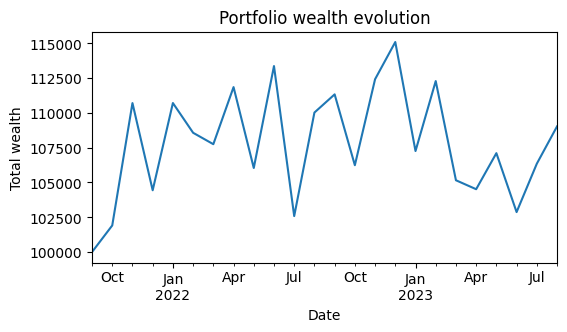

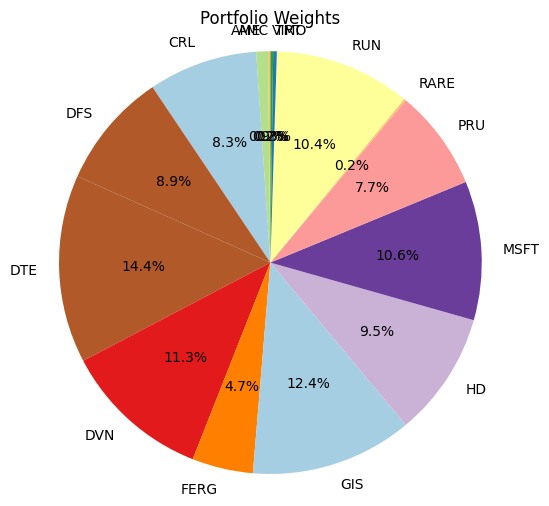

In [56]:
#--------------------------------------------------------------------------
# 3.2 Portfolio wealth evolution plot
#--------------------------------------------------------------------------
# Calculate the dates of the out-of-sample period

fig = plt.figure(1)

portfValue.plot(title = 'Portfolio wealth evolution',
                ylabel = 'Total wealth',
                figsize = (6, 3),
                legend = False)
plt.savefig("/content/drive/My Drive/MIE479 Capstone Project/Portfolio Construction/images/wealth.svg")

#--------------------------------------------------------------------------
# 3.3 Portfolio weights plot
#--------------------------------------------------------------------------
# Portfolio weights


fig2 = plt.figure(2);

x[x < 0] = 0
weights = pd.DataFrame(x, index = tickers)
weights.columns = [col + 1 for col in weights.columns]

# Plotting a pie chart
fig, ax = plt.subplots(figsize=(6, 6))
colors = plt.cm.Paired(np.linspace(0, 1, len(tickers)))
np.random.shuffle(colors)

ax.pie(x[:,0], labels=tickers, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Add a title
plt.title('Portfolio Weights')
plt.savefig("/content/drive/My Drive/MIE479 Capstone Project/Portfolio Construction/images/weights.svg");

# Show the plot
plt.show()


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# % Program End